In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

import seaborn as sns
sns.set_style('whitegrid')



xlim = (-5, 55)

%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
plt.rcParams['figure.dpi'] = 150.0
plt.rcParams['savefig.dpi'] = 150.0

In [3]:
colors = plt.rcParams['axes.prop_cycle']
BLUE = colors.by_key()['color'][0]

In [4]:
N = 100

sigma = 10.

np.random.seed(6)
x = np.random.randn(N)*sigma + 22
y = np.random.randn(N) + x

## Sample from the joint

(-5, 55)

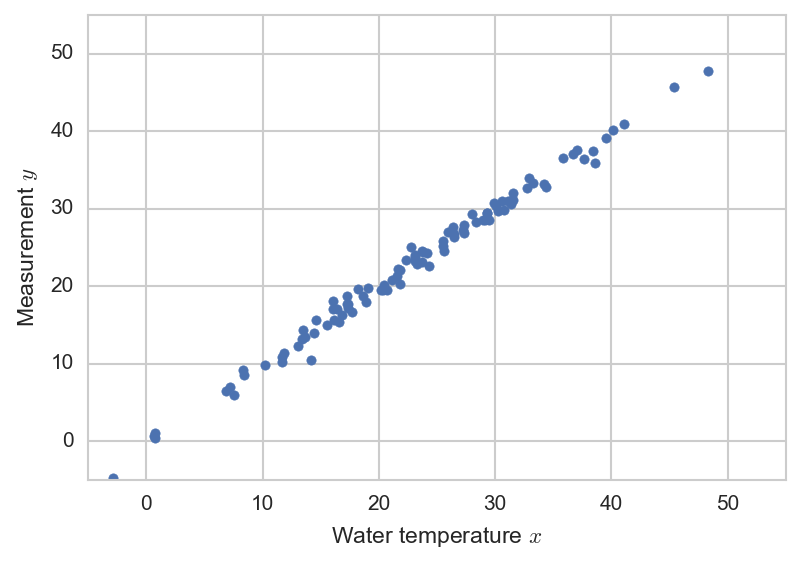

In [5]:
plt.scatter(x, y, color=BLUE)
plt.xlabel('Water temperature $x$')
plt.ylabel('Measurement $y$')
plt.xlim(xlim)
plt.ylim(xlim)

## Rejction sampling doesn't work

Conditioning on $y=25$

(-5, 55)

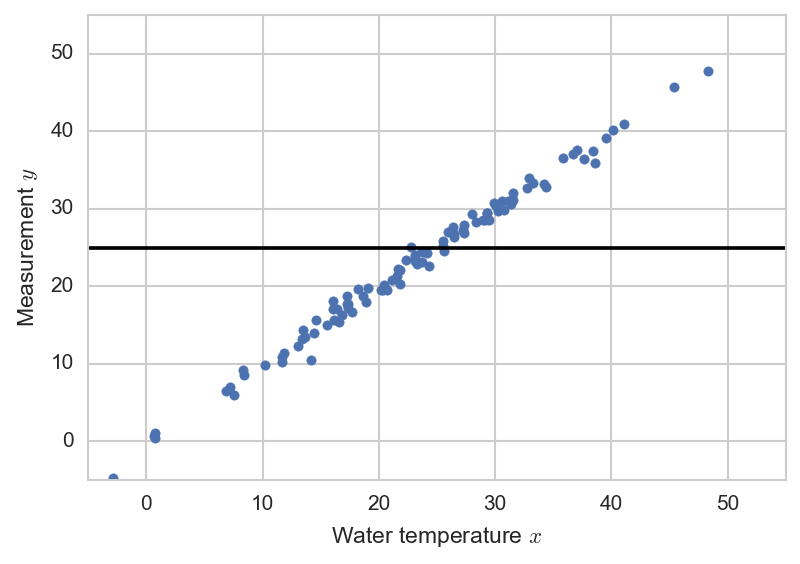

In [6]:
measured = 25.0
domain = np.linspace(*xlim, num=200)

plt.scatter(x, y, color=BLUE)
plt.xlabel('Water temperature $x$')
plt.ylabel('Measurement $y$')
plt.plot(xlim, [measured, measured], 'k-')
# plt.plot(domain, stats.norm(22, sigma).pdf(domain)*100, color='#CC6633')
plt.xlim(xlim)
plt.ylim(xlim)

In [7]:
(y == measured).sum()

0

## Likelihood weighting

(-5, 55)

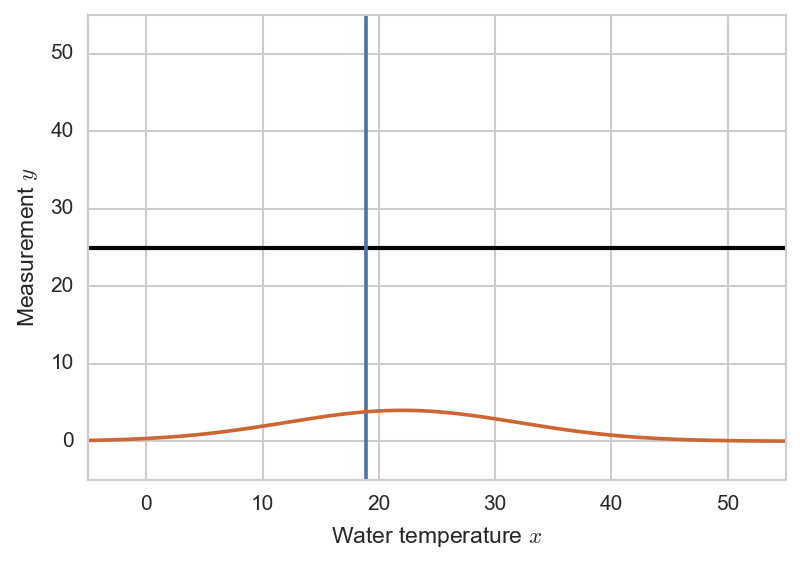

In [8]:
# plt.scatter(x, y)
plt.xlabel('Water temperature $x$')
plt.ylabel('Measurement $y$')
plt.plot(xlim, [measured, measured], 'k-', linewidth=2)
# plt.plot(x, measured*np.ones_like(x), 'o', color=BLUE, markersize=7)
plt.plot([x[0], x[0]], xlim, '-', color=BLUE)
plt.plot(domain, stats.norm(22, sigma).pdf(domain)*100, color='#CC6633')
plt.xlim(xlim)
plt.ylim(xlim)

(-5, 55)

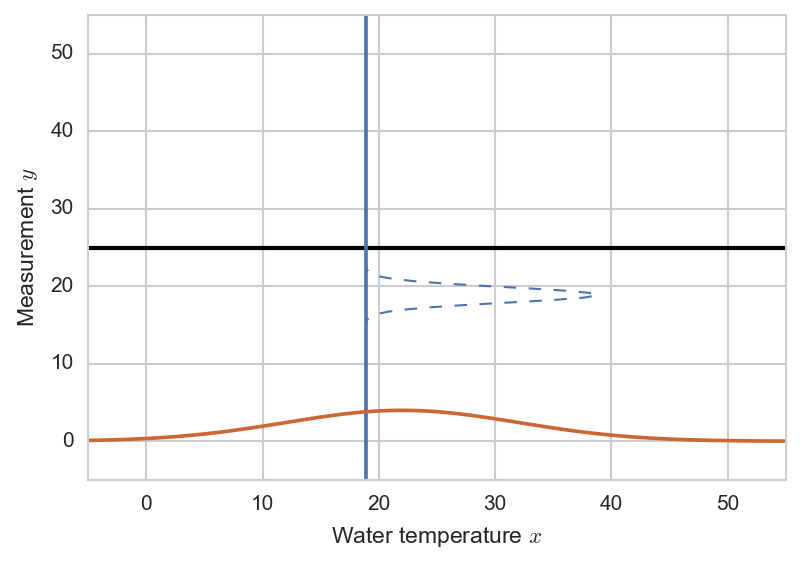

In [9]:
# plt.scatter(x, y)
plt.xlabel('Water temperature $x$')
plt.ylabel('Measurement $y$')
plt.plot(xlim, [measured, measured], 'k-', linewidth=2)
# plt.plot(x, measured*np.ones_like(x), 'o', color=BLUE, markersize=7)
plt.plot(x[0] + stats.norm(x[0], 1).pdf(domain)*50, domain, '--', linewidth=1, color=BLUE)
plt.plot([x[0], x[0]], xlim, '-', color=BLUE)
plt.plot(domain, stats.norm(22, sigma).pdf(domain)*100, color='#CC6633')
plt.xlim(xlim)
plt.ylim(xlim)

(-5, 55)

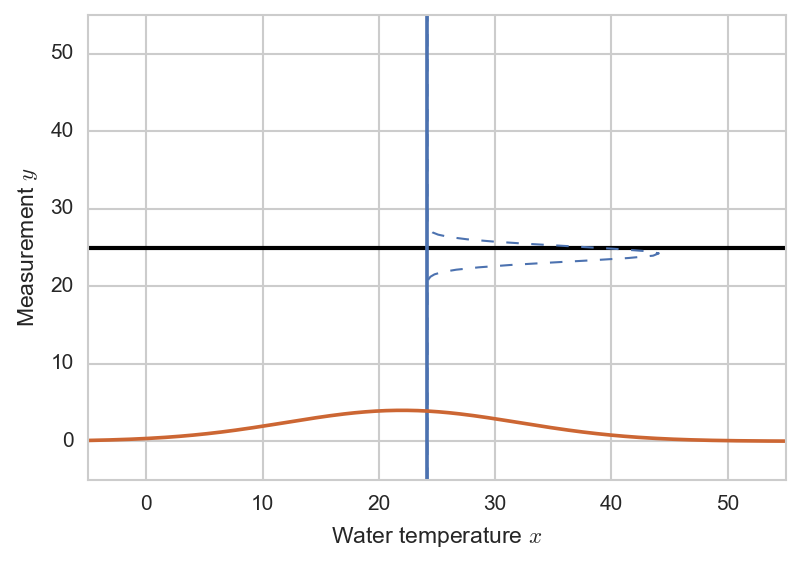

In [10]:
# plt.scatter(x, y)
ix = 2

plt.xlabel('Water temperature $x$')
plt.ylabel('Measurement $y$')
plt.plot(xlim, [measured, measured], 'k-', linewidth=2)
# plt.plot(x, measured*np.ones_like(x), 'o', color=BLUE, markersize=7)
plt.plot(x[ix] + stats.norm(x[ix], 1).pdf(domain)*50, domain, '--', linewidth=1, color=BLUE)
plt.plot([x[ix], x[ix]], xlim, '-', color=BLUE)
plt.plot(domain, stats.norm(22, sigma).pdf(domain)*100, color='#CC6633')
plt.xlim(xlim)
plt.ylim(xlim)

(-5, 55)

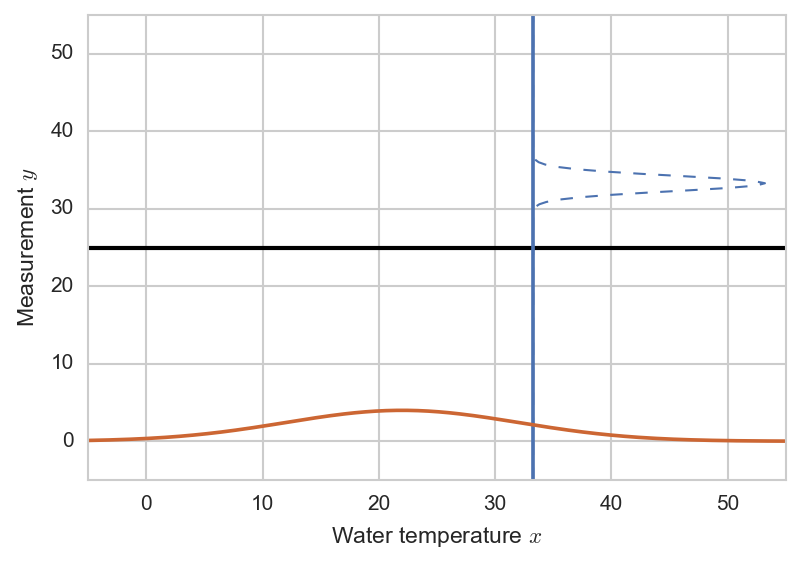

In [11]:
ix = 6

plt.xlabel('Water temperature $x$')
plt.ylabel('Measurement $y$')
plt.plot(xlim, [measured, measured], 'k-', linewidth=2)
# plt.plot(x, measured*np.ones_like(x), 'o', color=BLUE, markersize=7)
plt.plot(x[ix] + stats.norm(x[ix], 1).pdf(domain)*50, domain, '--', linewidth=1, color=BLUE)
plt.plot([x[ix], x[ix]], xlim, '-', color=BLUE)
plt.plot(domain, stats.norm(22, sigma).pdf(domain)*100, color='#CC6633')
plt.xlim(xlim)
plt.ylim(xlim)

(-5, 55)

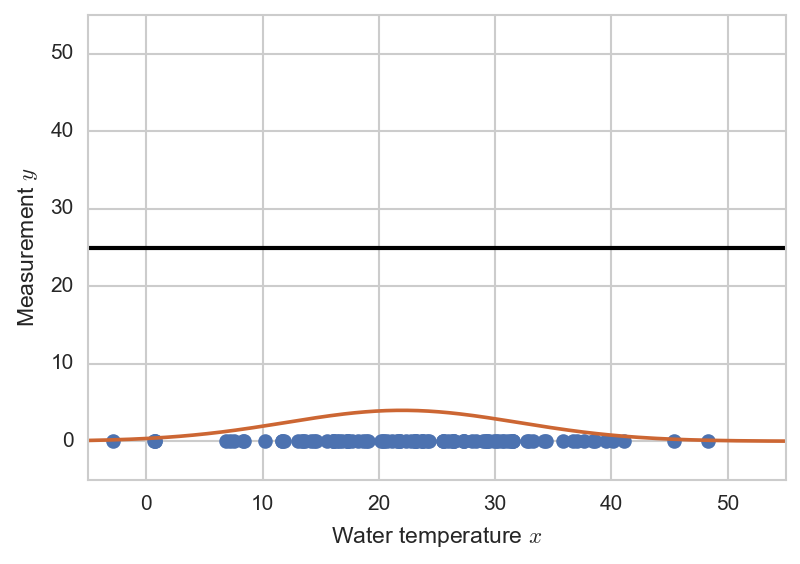

In [12]:
# plt.scatter(x, y)
plt.xlabel('Water temperature $x$')
plt.ylabel('Measurement $y$')
plt.plot(xlim, [measured, measured], 'k-', linewidth=2)
# plt.plot(x, measured*np.ones_like(x), 'o', color=BLUE, markersize=7)
plt.plot(x, measured*np.zeros_like(x), 'o', color=BLUE, markersize=7)
plt.plot(domain, stats.norm(22, sigma).pdf(domain)*100, color='#CC6633')
plt.xlim(xlim)
plt.ylim(xlim)

(-5, 55)

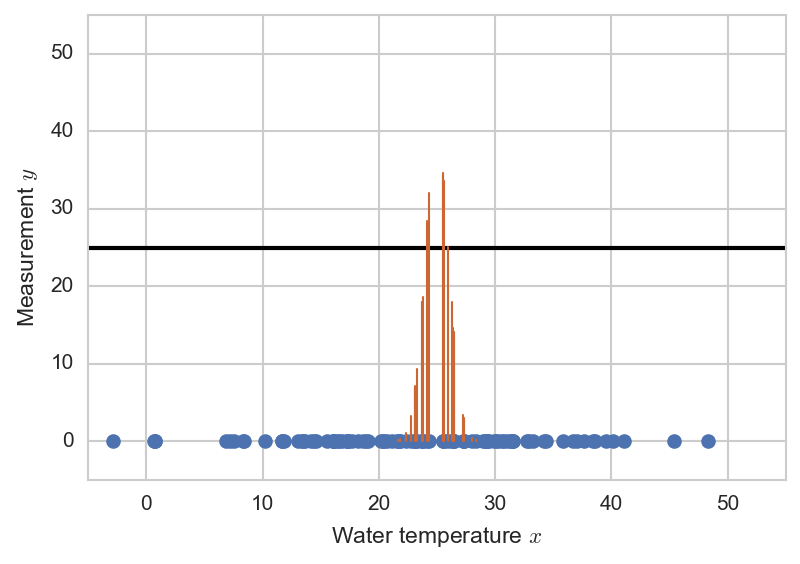

In [13]:
weight_scale = 100
weight = stats.norm(measured, 1).pdf(x) * weight_scale

# plt.scatter(x, y)
plt.xlabel('Water temperature $x$')
plt.ylabel('Measurement $y$')
plt.plot(xlim, [measured, measured], 'k-', linewidth=2)
# plt.plot(x, measured*np.ones_like(x), 'o', color=BLUE, markersize=7)
plt.plot(x, measured*np.zeros_like(x), 'o', color=BLUE, markersize=7)
for i in xrange(x.shape[0]):
    xx = x[i]
    plt.plot([xx, xx], [0.0, weight[i]], '-', color='#CC6633', linewidth=1)

plt.xlim(xlim)
plt.ylim(xlim)

## MCMC

In [14]:
unnormalized_density = stats.norm(22, sigma).pdf(domain) * stats.norm(domain, 1).pdf(measured)
unnormalized_density *= 1200

(-5, 55)

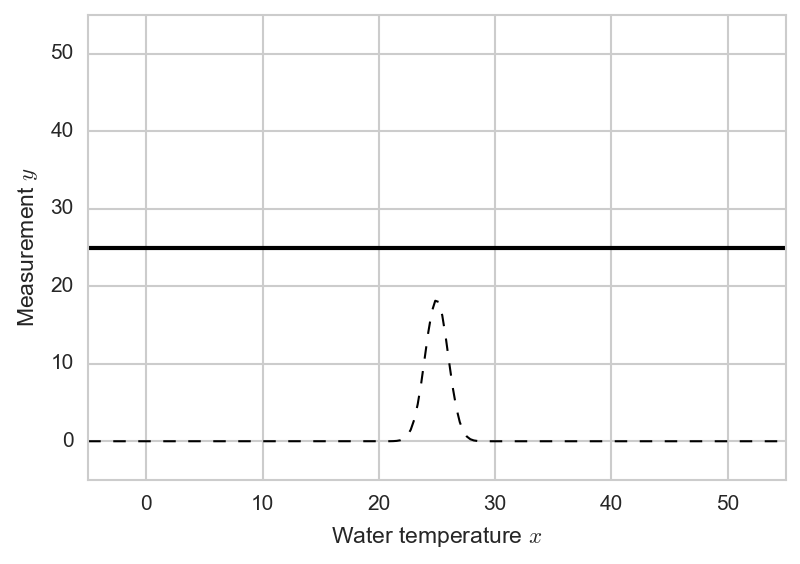

In [15]:
plt.xlabel('Water temperature $x$')
plt.ylabel('Measurement $y$')
plt.plot(xlim, [measured, measured], 'k-', linewidth=2)
plt.plot(domain, unnormalized_density, 'k--', linewidth=1)
plt.xlim(xlim)
plt.ylim(xlim)

(-5, 55)

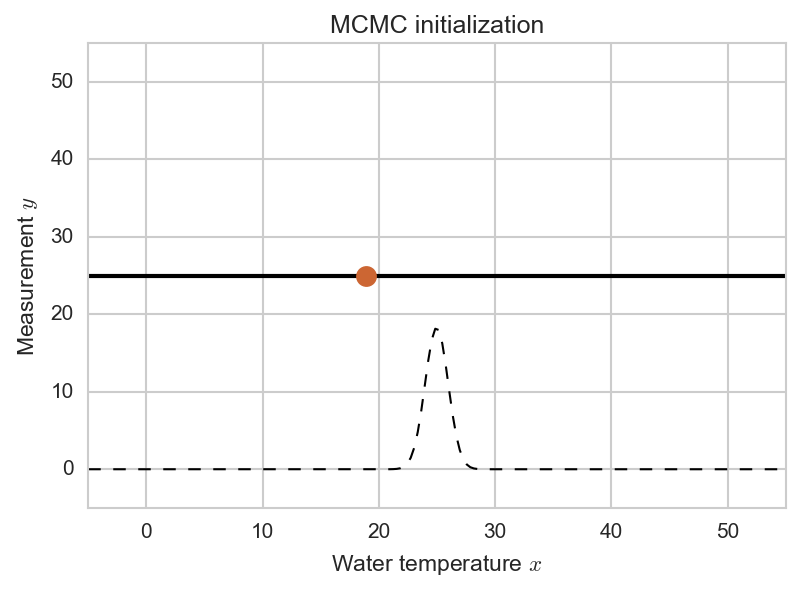

In [16]:
chain = [x[0]]
np.random.seed(1)

plt.xlabel('Water temperature $x$')
plt.ylabel('Measurement $y$')
plt.plot(xlim, [measured, measured], 'k-', linewidth=2)
plt.plot(domain, unnormalized_density, 'k--', linewidth=1)
plt.plot(chain, measured*np.ones_like(chain), 'o', color=BLUE, markersize=7)
plt.plot(chain[-1], measured, 'o', color='#CC6633', markersize=10)
plt.title('MCMC initialization')
plt.xlim(xlim)
plt.ylim(xlim)

(-5, 55)

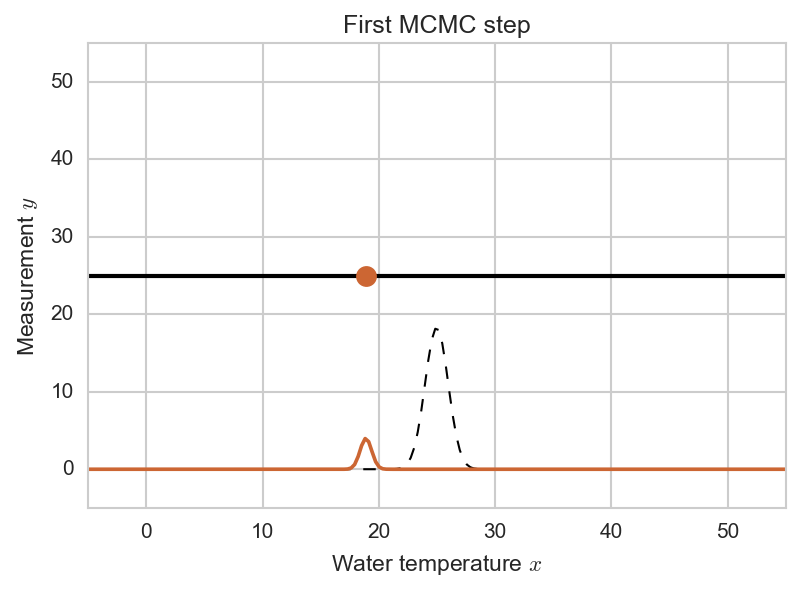

In [17]:
epsilon = 0.5

plt.xlabel('Water temperature $x$')
plt.ylabel('Measurement $y$')
plt.plot(xlim, [measured, measured], 'k-', linewidth=2)
plt.plot(domain, unnormalized_density, 'k--', linewidth=1)
plt.plot(chain, measured*np.ones_like(chain), 'o', color=BLUE, markersize=7)
plt.plot(chain[-1], measured, 'o', color='#CC6633', markersize=10)
plt.plot(domain, stats.norm(chain[-1], epsilon).pdf(domain)*5, color='#CC6633')
plt.title('First MCMC step')
plt.xlim(xlim)
plt.ylim(xlim)

In [18]:
score = lambda xx: stats.norm(22, sigma).pdf(xx) * stats.norm(xx, 1).pdf(measured)
           
def mcmc_step(chain):
    proposed = np.random.randn()*epsilon + chain[-1]
    if np.random.rand() <  score(proposed)/score(chain[-1]):
        chain.append(proposed)
    else:
        chain.append(chain[-1])

In [19]:
for i in xrange(1):
    mcmc_step(chain)

(-5, 55)

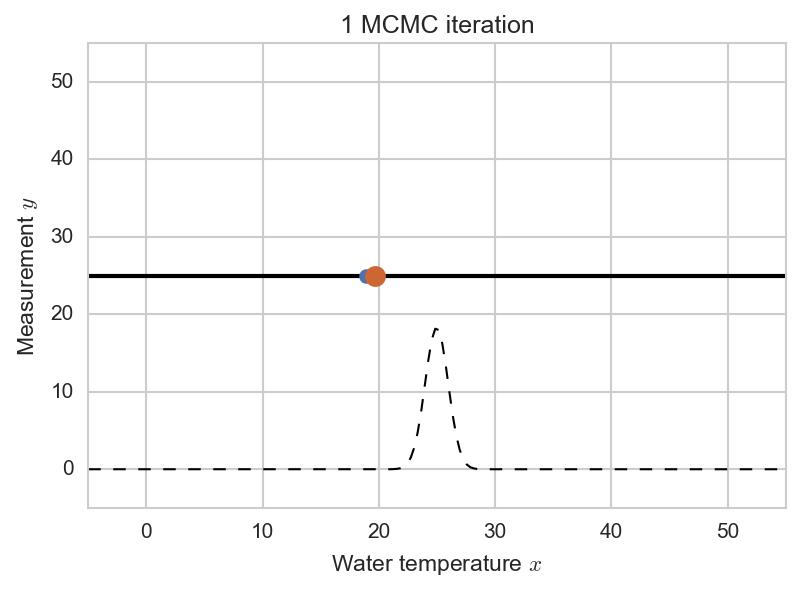

In [20]:
plt.xlabel('Water temperature $x$')
plt.ylabel('Measurement $y$')
plt.plot(xlim, [measured, measured], 'k-', linewidth=2)
plt.plot(domain, unnormalized_density, 'k--', linewidth=1)
plt.plot(chain, measured*np.ones_like(chain), 'o', color=BLUE, markersize=7)
plt.plot(chain[-1], measured, 'o', color='#CC6633', markersize=10)
plt.title('%d MCMC iteration' % (len(chain)-1))
plt.xlim(xlim)
plt.ylim(xlim)

In [21]:
for i in xrange(9):
    mcmc_step(chain)

(-5, 55)

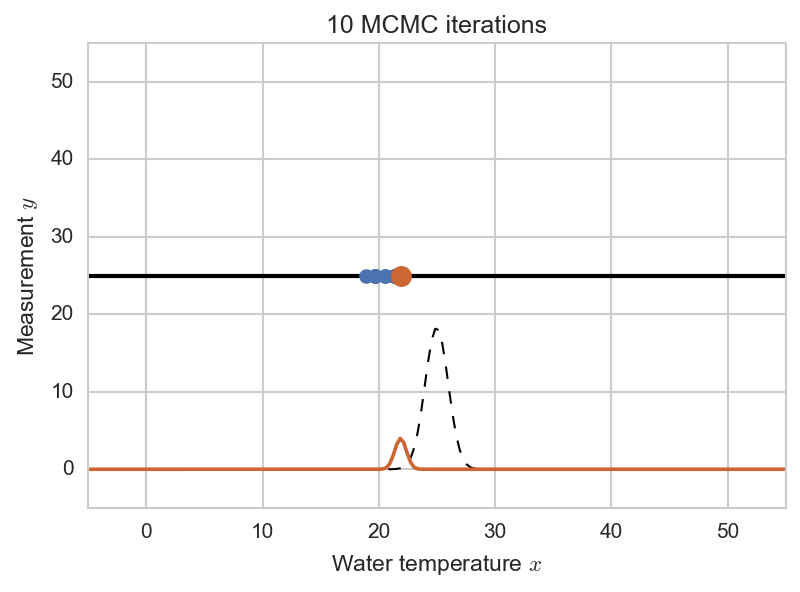

In [22]:
plt.xlabel('Water temperature $x$')
plt.ylabel('Measurement $y$')
plt.plot(xlim, [measured, measured], 'k-', linewidth=2)
plt.plot(domain, unnormalized_density, 'k--', linewidth=1)
plt.plot(chain, measured*np.ones_like(chain), 'o', color=BLUE, markersize=7)
plt.plot(chain[-1], measured, 'o', color='#CC6633', markersize=10)
plt.plot(domain, stats.norm(chain[-1], epsilon).pdf(domain)*5, color='#CC6633')
plt.title('%d MCMC iterations' % (len(chain)-1))
plt.xlim(xlim)
plt.ylim(xlim)

In [23]:
for i in xrange(90):
    mcmc_step(chain)

(-5, 55)

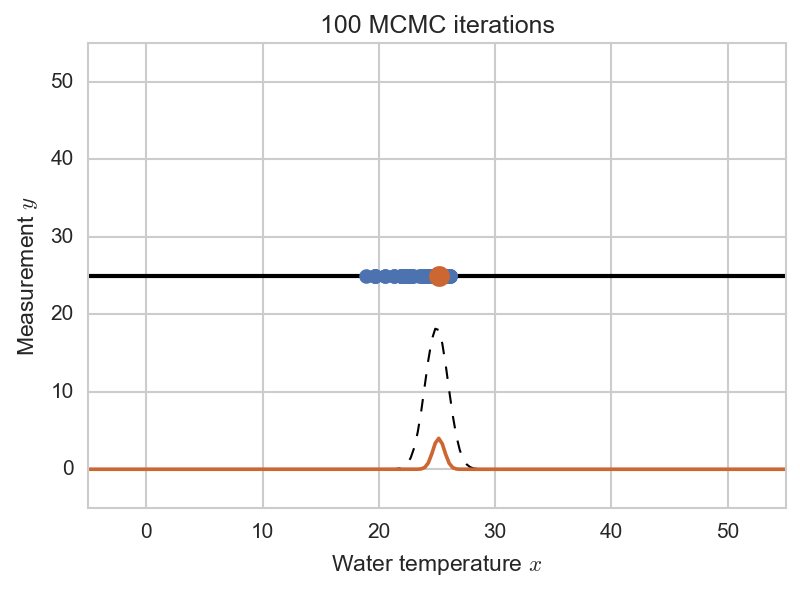

In [24]:
plt.xlabel('Water temperature $x$')
plt.ylabel('Measurement $y$')
plt.plot(xlim, [measured, measured], 'k-', linewidth=2)
plt.plot(domain, unnormalized_density, 'k--', linewidth=1)
plt.plot(chain, measured*np.ones_like(chain), 'o', color=BLUE, markersize=7)
plt.plot(chain[-1], measured, 'o', color='#CC6633', markersize=10)
plt.plot(domain, stats.norm(chain[-1], epsilon).pdf(domain)*5, color='#CC6633')
plt.title('%d MCMC iterations' % (len(chain)-1))
plt.xlim(xlim)
plt.ylim(xlim)

In [25]:
for i in xrange(100):
    mcmc_step(chain)

(-5, 55)

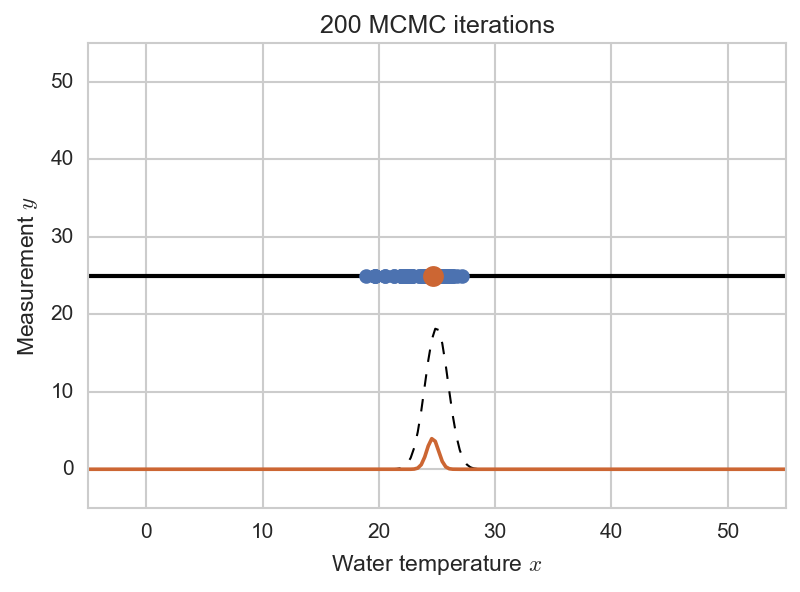

In [26]:
plt.xlabel('Water temperature $x$')
plt.ylabel('Measurement $y$')
plt.plot(xlim, [measured, measured], 'k-', linewidth=2)
plt.plot(domain, unnormalized_density, 'k--', linewidth=1)
plt.plot(chain, measured*np.ones_like(chain), 'o', color=BLUE, markersize=7)
plt.plot(chain[-1], measured, 'o', color='#CC6633', markersize=10)
plt.plot(domain, stats.norm(chain[-1], epsilon).pdf(domain)*5, color='#CC6633')
plt.title('%d MCMC iterations' % (len(chain)-1))
plt.xlim(xlim)
plt.ylim(xlim)

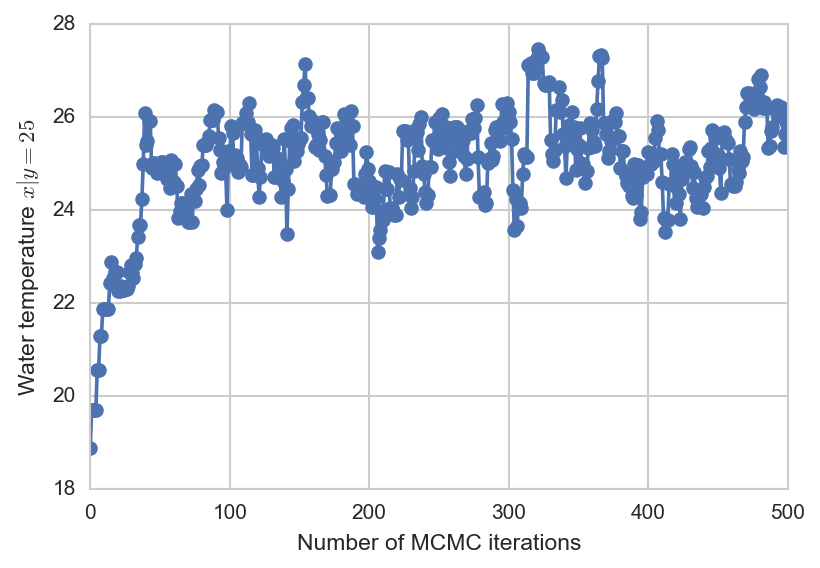

In [27]:
for i in xrange(500-len(chain)):
    mcmc_step(chain)

plt.xlabel('Number of MCMC iterations')
plt.ylabel('Water temperature $x|y=%d$' % measured)
plt.plot(chain, '-o', color=BLUE)

(-5, 55)

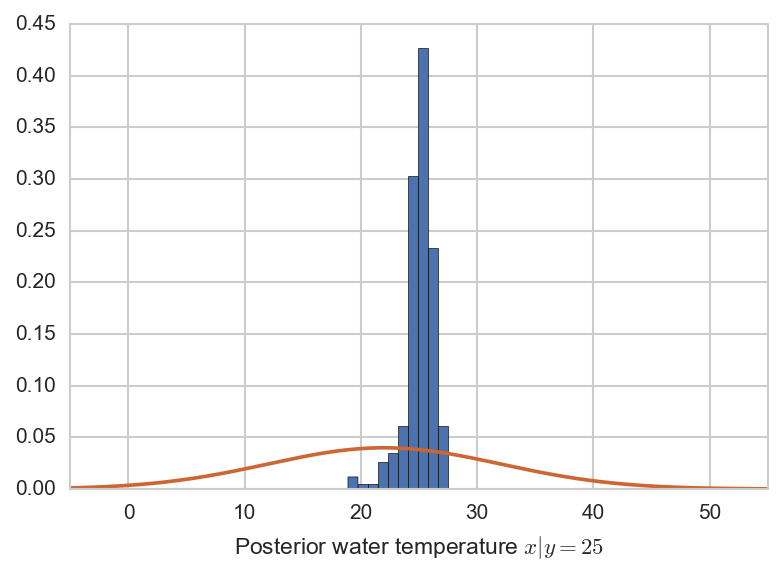

In [28]:
plt.xlabel('Posterior water temperature $x|y=25$')
#plt.hist(chain[len(chain)/2:], color=BLUE, normed=True, bins=10)
plt.hist(chain, color=BLUE, normed=True, bins=10)
plt.plot(domain, stats.norm(22, sigma).pdf(domain), color='#CC6633')
plt.xlim(xlim)

(-5, 55)

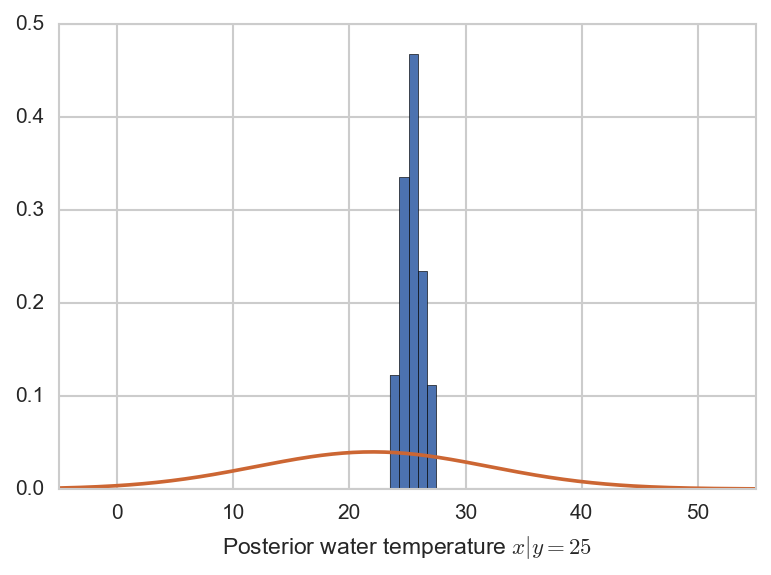

In [29]:
plt.xlabel('Posterior water temperature $x|y=25$')
plt.hist(chain[len(chain)/2:], color=BLUE, normed=True, bins=5)
# plt.hist(chain, color=BLUE, normed=True, bins=10)
plt.plot(domain, stats.norm(22, sigma).pdf(domain), color='#CC6633')
plt.xlim(xlim)

## True posterior

In [30]:
ss_est = 1. / (1. + 1./sigma**2)
mu_est = (measured/1. + 22/sigma**2) * ss_est
print mu_est, np.sqrt(ss_est)

24.9702970297 0.99503719021


(-5, 55)

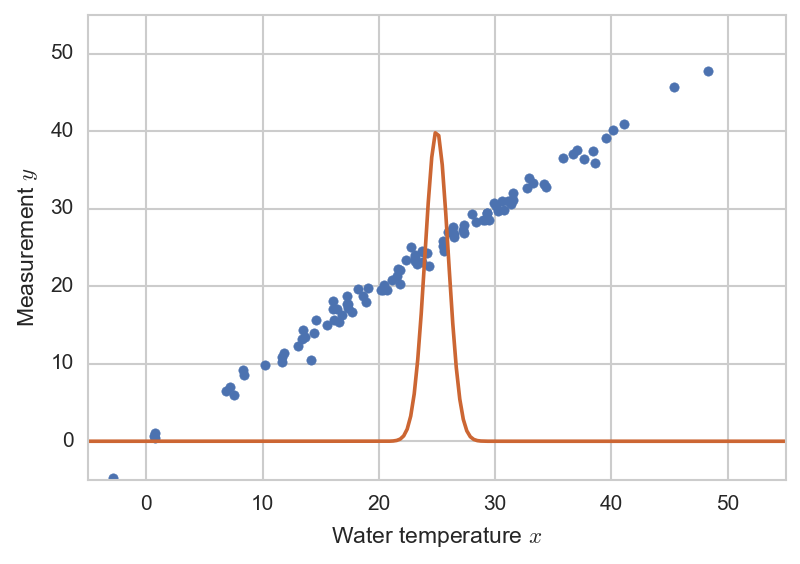

In [31]:
plt.scatter(x, y, color=BLUE)
plt.xlabel('Water temperature $x$')
plt.ylabel('Measurement $y$')
plt.plot(domain, stats.norm(mu_est, np.sqrt(ss_est)).pdf(domain)*100, color='#CC6633')
plt.xlim(xlim)
plt.ylim(xlim)

## Unused plots

(-5, 55)

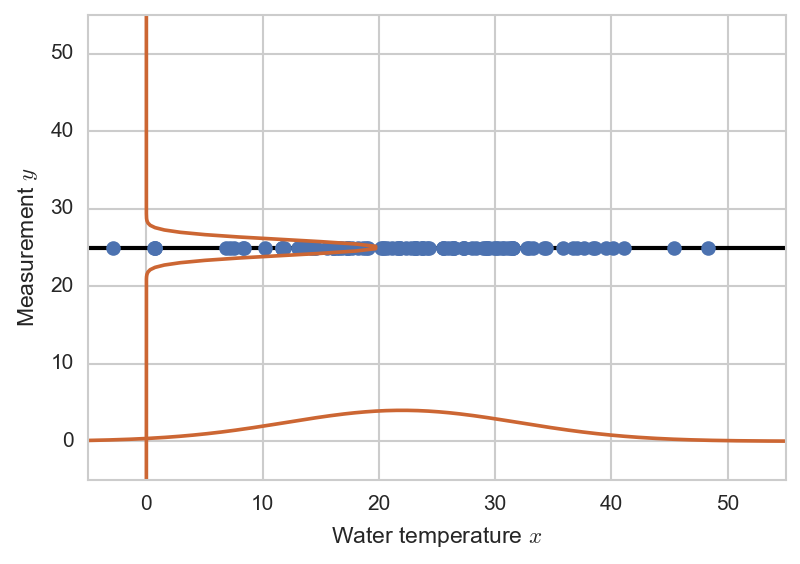

In [32]:
domain = np.linspace(*xlim, num=200)
# plt.scatter(x, y)
plt.xlabel('Water temperature $x$')
plt.ylabel('Measurement $y$')
plt.plot(xlim, [measured, measured], 'k-', linewidth=2)
plt.plot(x, measured*np.ones_like(x), 'o', color=BLUE, markersize=7)
plt.plot(domain, stats.norm(22, sigma).pdf(domain)*100, color='#CC6633')
plt.plot(stats.norm(measured, 1).pdf(domain)*50, domain, color='#CC6633')
plt.xlim(xlim)
plt.ylim(xlim)

(-5, 55)

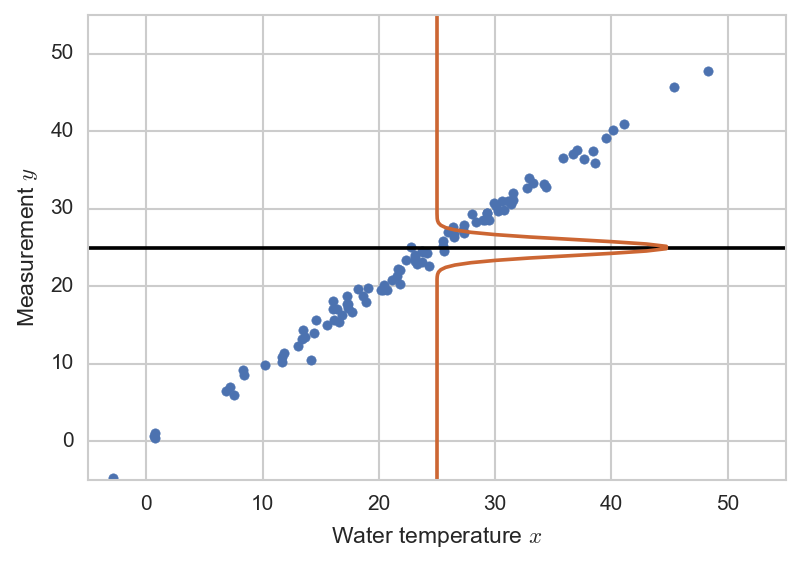

In [33]:
plt.scatter(x, y, color=BLUE)
plt.xlabel('Water temperature $x$')
plt.ylabel('Measurement $y$')
plt.plot(xlim, [measured, measured], 'k-')
plt.plot(measured + stats.norm(measured, 1).pdf(domain)*50, domain, color='#CC6633')
plt.xlim(xlim)
plt.ylim(xlim)